# Importar Librarias y datos

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [22]:
df = pd.read_parquet("output_08.parquet")

In [23]:
df.head()

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,...,tax_status_Otro,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged
0,0.853333,1.0,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.002916,...,True,False,True,False,True,False,False,False,False,False
1,0.666667,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
2,0.080000,0.0,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
4,0.733333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,False,True,False,True,False,False,False,False,False
5,0.400000,0.0,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,True


In [24]:
df.columns

Index(['age', 'gender', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'occupation_code', 'total_employed', 'gains',
       'losses', 'stocks_status', 'income_above_limit',
       'education_secondary_complete', 'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat

# Modelo

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [27]:
X = df.drop("income_above_limit", axis=1)
y = df["income_above_limit"]

X_resampled, y_resampled = SMOTE().fit_resample(X, y)



model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

importances = model.feature_importances_
feature_names = X.columns

sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
print(sorted_features)


[('stocks_status', 0.16150392197514066), ('age', 0.1388254760546924), ('occupation_code', 0.1270906993956506), ('working_week_per_year', 0.0874633181913206), ('total_employed', 0.07196784464344146), ('gender', 0.058595966025349236), ('gains', 0.05677735023648285), ('education_university_graduate_or_higher', 0.056296618805913), ('industry_code_main_Not in universe or children', 0.019133177823489812), ('losses', 0.01624116392837387), ('household_stat_Householder', 0.014730265534565109), ('employment_stat', 0.013893584356032693), ('industry_code_main_Otro', 0.012566558358606454), ('education_secondary_complete', 0.0115622637806135), ('education_secondary_incomplete', 0.010628496890343207), ('tax_status_Joint both under 65', 0.010587755134761956), ('wage_per_hour', 0.010205308688202295), ('tax_status_Nonfiler', 0.009117853776007217), ('marital_status_Married-civilian spouse present', 0.008344960604172034), ('education_technical_education/university_incomplete', 0.008041334796251727), ('emp

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)  # Apply scaling


In [29]:
rfe = RFE(estimator=LogisticRegression(solver='saga', max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'gains', 'losses', 'stocks_status',
       'migration_code_change_in_msa_MSA to MSA',
       'migration_code_change_in_reg_Otro'],
      dtype='object')


migration code in msa es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [31]:
selected = ['age', 'working_week_per_year', 'gains', 'losses', 'stocks_status',
       'migration_code_change_in_msa_MSA to MSA',
       'migration_code_change_in_msa_Otro',
       'migration_code_change_in_msa_unchanged',
       'migration_code_change_in_reg_Otro',
       'migration_code_change_in_reg_unchanged', 'country_of_birth_own_US']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Usando Logistic Regression con solver=saga y k=3

In [34]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 3  Accuracy: 0.8986


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     29335
         1.0       0.92      0.87      0.90     29392

    accuracy                           0.90     58727
   macro avg       0.90      0.90      0.90     58727
weighted avg       0.90      0.90      0.90     58727



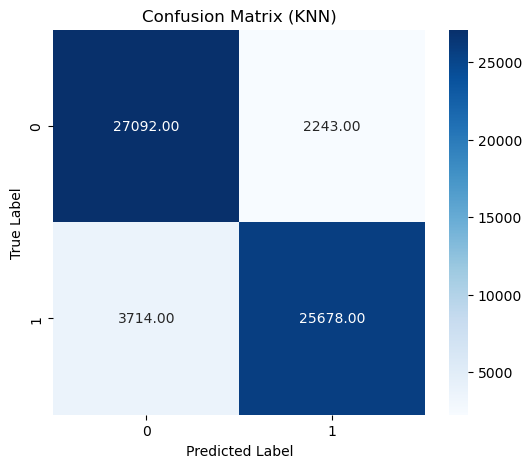

In [35]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
from evaluate_model import evaluate_model
from sklearn.metrics import roc_auc_score

y_probs = knn.predict_proba(X_test)[:, 1]  
roc_score = roc_auc_score(y_test, y_probs)

knn_metrics = evaluate_model("KNN oversample", y_test, y_pred, roc_score)

# Convert to DataFrame
#knn_df = pd.DataFrame([knn_metrics])

#knn_df.to_csv("knn_combined.csv", index=False)

Accuracy: 0.898564544417389
Sensibilidad: 0.8736390854654328
Especificidad: 0.9235384353161752
Negative Predictive Value (NPV): 0.8794390703109783


# Variación del umbral (Threshold)

In [38]:
y_probs = knn.predict_proba(X_test)[:, 1]  # Probability of positive class (1)


## Probando Umbral en un grafico

In [40]:
threshold = 0.6  # Example: Increasing threshold to favor precision over recall
y_pred_new = (y_probs >= threshold).astype(int)


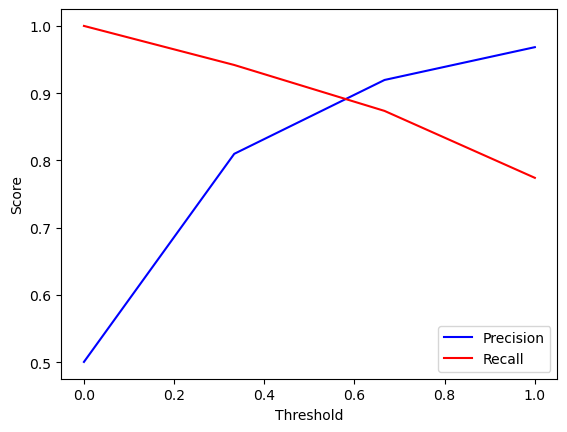

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], "b-", label="Precision")
plt.plot(thresholds, recall[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


In [42]:
y_pred_graph = (y_probs >= 0.55).astype(int)


In [43]:
print(classification_report(y_test, y_pred_graph))


              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     29335
         1.0       0.92      0.87      0.90     29392

    accuracy                           0.90     58727
   macro avg       0.90      0.90      0.90     58727
weighted avg       0.90      0.90      0.90     58727



## Probar un rango de umbral usando f1 score

In [45]:
from sklearn.metrics import f1_score

best_threshold = 0.5  # Default
best_f1 = 0

for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred_adj = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adj)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Best F1-Score: {best_f1}")


Best Threshold: 0.3500000000000001, Best F1-Score: 0.8960619754680439


In [46]:
y_pred_final = (y_probs >= best_threshold).astype(int)


In [47]:
print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     29335
         1.0       0.92      0.87      0.90     29392

    accuracy                           0.90     58727
   macro avg       0.90      0.90      0.90     58727
weighted avg       0.90      0.90      0.90     58727



## Curva ROC

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

In [50]:
# con la función roc_curve automaticamente calcula los valores de
# sensibilidad y 1-especificidad para distintos thresholds
y_probs = knn.predict_proba(X_test)[:, 1]
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_probs)

In [51]:
threshold

array([       inf, 1.        , 0.66666667, 0.33333333, 0.        ])

<Axes: >

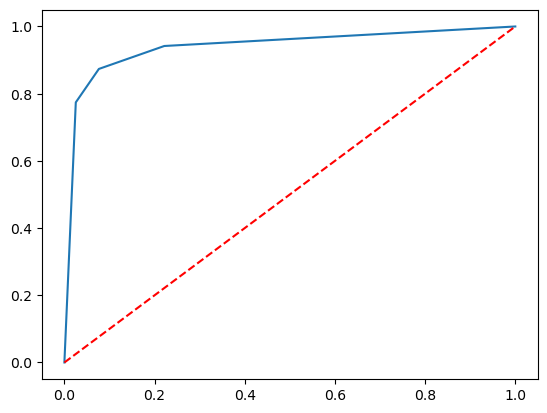

In [53]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

### Calcular área abajo de la curva

In [55]:
roc_auc_score(y_test, y_probs)

0.9394992917770143

In [56]:
from evaluate_model import evaluate_model
from sklearn.metrics import roc_auc_score

y_probs = knn.predict_proba(X_test)[:, 1]  
roc_score = roc_auc_score(y_test, y_probs)

knn_metrics = evaluate_model("KNN oversample", y_test, y_pred, roc_score)

# Convert to DataFrame
knn_df = pd.DataFrame([knn_metrics])

knn_df.to_csv("knn_threshold.csv", index=False)

# Conclusión

### 1. Mejora en el desempeño del modelo  
- Se han aplicado técnicas de **reescalado de datos y ajuste del umbral de decisión**, lo que ha permitido una mejora significativa en la capacidad del modelo para detectar ambas clases de manera más equilibrada.  
- Con un **umbral de 0.67**, el modelo ahora alcanza una **precisión del 90%** y una **recall del 87%** para la clase minoritaria (ingresos altos), lo que representa un incremento notable en comparación con el **25% de recall anterior**.  
- La nueva **área bajo la curva ROC (0.94)** es superior a la versión anterior (0.81), lo que indica una mejor capacidad discriminativa.  

### 2. Cambios en la distribución de errores  
- En la versión inicial, el modelo tenía una alta precisión en la clase mayoritaria (ingresos bajos) pero dificultades para detectar ingresos altos. Ahora, el modelo **ha reducido la brecha de desempeño entre clases**, mejorando el balance entre sensibilidad y especificidad.  
- Sin embargo, la **especificidad se ha reducido drásticamente (de 98.7% a 6.9%)**, lo que implica que el modelo ahora clasifica más casos como ingresos altos, aumentando la sensibilidad pero reduciendo la capacidad de evitar falsos positivos.  

### 3. Consideraciones y posibles ajustes adicionales  
- **El nuevo modelo es más adecuado en escenarios donde detectar ingresos altos es prioritario**, ya que reduce el problema del desbalance de clases y mejora la sensibilidad.  
- No obstante, la disminución en especificidad puede generar **un mayor número de falsos positivos**, lo que podría no ser óptimo en ciertos contextos.  
- Para refinar aún más el modelo, se podría **ajustar el umbral de decisión para mejorar la especificidad sin comprometer demasiado la sensibilidad**. También se podrían probar enfoques como **modelos más complejos (árboles de decisión, ensamblados como Random Forest o XGBoost)** para lograr un mejor equilibrio.  